In [47]:
from array import array
import numpy as np
import math
import pandas as pd
from matplotlib import *

In [3]:
print("allocating coordinates of water molecule in hydrates examples")

allocating coordinates of water molecule in hydrates examples


In [30]:
lines1=open("water.geom").readlines()

store = []
for i in range(len(lines1)):
    store.append(str(lines1[i].split()[1][0]))
    store.append(float(lines1[i].split()[2]))
    store.append(float(lines1[i].split()[3]))
    store.append(float(lines1[i].split()[4]))
# print(store)

In [31]:
num_water = int(len(store)/12)
store_arr = X = np.array(store)
print(num_water)
np.shape(store_arr)
reshape_store = np.reshape(store_arr,(num_water*3,4))

df = pd.DataFrame(reshape_store)
df.to_csv('output.csv', index=False, header=False)

103


In [57]:
bonds = []
angles = []

for i in range(num_water):
    if (reshape_store[i*3][0][0] == 'O'):
#         print("the first atom is O")
        o = np.array((float(reshape_store[i*3][1]), float(reshape_store[i*3][2]), float(reshape_store[i*3][3])))
        h1 = np.array((float(reshape_store[i*3+1][1]), float(reshape_store[i*3+1][2]), float(reshape_store[i*3+1][3])))
        h2 = np.array((float(reshape_store[i*3+2][1]), float(reshape_store[i*3+2][2]), float(reshape_store[i*3+2][3])))
    elif (reshape_store[i*3][0][0] == 'H'):
#         print("the first atom is H")
        h1 = np.array((float(reshape_store[i*3][1]), float(reshape_store[i*3][2]), float(reshape_store[i*3][3])))
        h2 = np.array((float(reshape_store[i*3+1][1]), float(reshape_store[i*3+1][2]), float(reshape_store[i*3+1][3])))
        o = np.array((float(reshape_store[i*3+2][1]), float(reshape_store[i*3+2][2]), float(reshape_store[i*3+2][3])))

    bonds.append(np.linalg.norm(o-h1))
    bonds.append(np.linalg.norm(o-h2))
    oh1 = h1 - o
    oh2 = h2 - o
    cosine_angle = np.dot(oh1, oh2) / (np.linalg.norm(oh1) * np.linalg.norm(oh2))
    angles.append(np.degrees(np.arccos(cosine_angle)))
    
print("bonds[angstroms] min mean max")
# print(bonds)
print(np.amin(bonds))
print(np.array(bonds).mean())
print(np.amax(bonds))
print("angles[*] min mean max")
# print(angles)
print(np.amin(angles))
print(np.array(angles).mean())
print(np.amax(angles))

bonds[angstroms] min mean max
0.690375978090924
0.8828773923370479
1.11852486296014
angles[*] min mean max
95.60612147597172
106.87787770412504
122.46456268012835


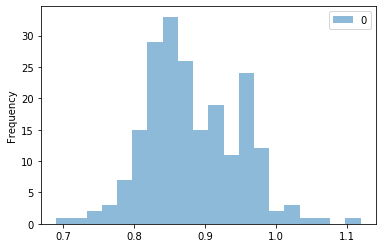

In [53]:
df_bonds = pd.DataFrame(bonds)
ax_bonds = df_bonds.plot.hist(bins=20, alpha=0.5)

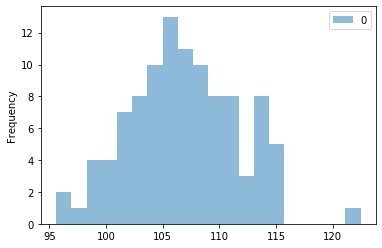

In [50]:
df_angles = pd.DataFrame(angles)
ax_angles = df_angles.plot.hist(bins=20, alpha=0.5)